In [66]:

from helpers import classifiers
from helpers.custom_class import *
from helpers.custom_helper import *

from helpers.custom_class import ClassesTracker

from test_file import graphs3d, graphs2d, Hist1D, bar_hist

import random
import matplotlib.pyplot  as plt

from skimage.io import imshow
import pandas as pd


%matplotlib notebook

## Visualisation en 2D des dimensions

Watching  4 dims
Pre processing of all the data finished in  0:00:21.124909
We will print 6 graphs


<IPython.core.display.Javascript object>


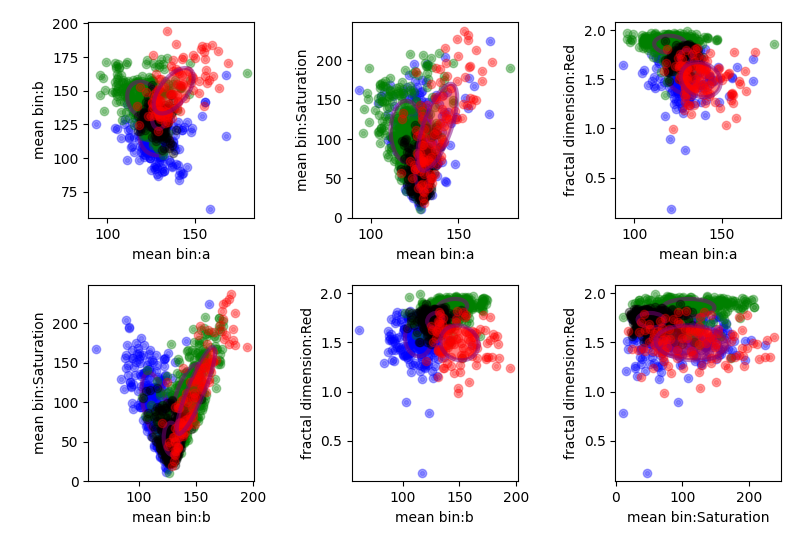

In [67]:
graphs2d()

## Visualisation des distributions de chacune des dimensions

Watching  4 dims
Pre processing of all the data finished in  0:00:21.361334
We will print 4 graphs


<IPython.core.display.Javascript object>


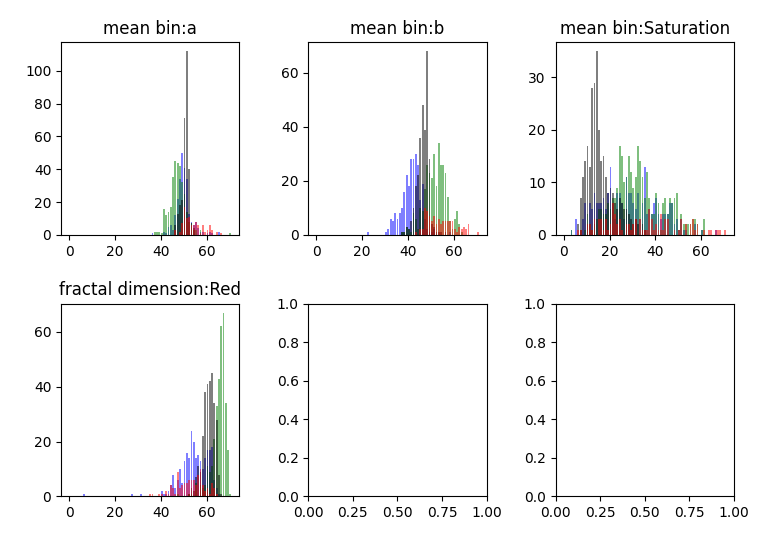

In [68]:
Hist1D()

## Explications sur la dimension fractale

Prenons quelques images de la base de données afin de mieux comprendre et visualiser la métrique de dimension fractale. 

On charge les données:

In [69]:
CT = ClassesTracker()

Watching  4 dims
Pre processing of all the data finished in  0:00:21.332361


On tire au sort 2 images de coasts au hasard, 2 images de forests et 2 images de streets

In [70]:
get_n_rand = lambda sett,n :random.sample(sett, n)
idx = get_n_rand(sett = CT.coast_id,n=2)+get_n_rand(sett = CT.forest_id,n=2)+get_n_rand(sett = CT.street_id,n=2)


<IPython.core.display.Javascript object>


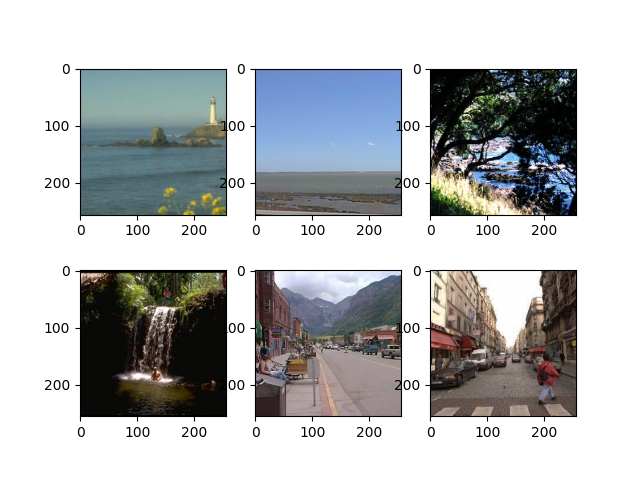

In [71]:
fig, ax = plt.subplots(2,3)
for i_graphe,i_image in enumerate(idx):
    ax[i_graphe//3,i_graphe%3].imshow(CT.images[i_image])
plt.show()

Pour obtenir l'image fractal sur lequelle on calcul notre dimension, on convertit l'image en gris puis on applique un threshold (pixel en dessous du threshold est egal à 1, le reste à 0).

In [72]:
def threshold_fractal(Z, threshold = 100):
    def rgb2gray(rgb):
        r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        return gray
    Z = rgb2gray(Z)
    Z = (Z < threshold)
    return Z

<IPython.core.display.Javascript object>


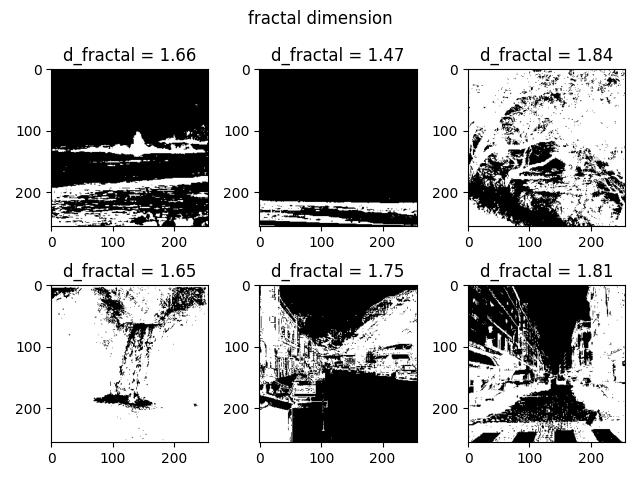

In [77]:
fig, ax = plt.subplots(2,3)
data_fractal = np.zeros((2,3))
    
for i_graphe,i_image in enumerate(idx):
    ax[i_graphe//3,i_graphe%3].imshow(threshold_fractal(Z = CT.images[i_image]),cmap='gray')
    d=fractal_dimension(Z = CT.images[i_image])[0]
    ax[i_graphe//3,i_graphe%3].title.set_text(f'd_fractal = {d:.2f}')
fig.suptitle('Fractal dimension')
plt.tight_layout()
plt.show()

On calcule alors le alors la dimension fractale de la partie blanche de l'image par la méthode du box counting. La dimension fractale est plus proche de 2 que de 1 car la partie blanche est une aire et pas une ligne.

Il s'agit ici d'une observation sur très peu d'echantillons. Il faut visualiser la distribution statistique sur l'ensemble de la base de données pour pouvoir constater que l'on obtient des distributions relativement disjointes pour chacunes de classes. 

0 / 260
52 / 260
104 / 260
156 / 260
208 / 260
0 / 980
196 / 980
392 / 980
588 / 980
784 / 980
Get Stats finished in  0:00:01.970562


<IPython.core.display.Javascript object>


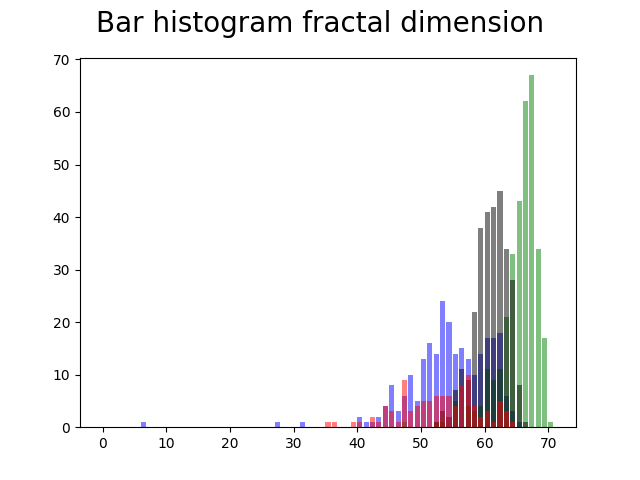

In [74]:
bar_hist(mode=RGB,dim=d_fractal,dim_index=0,n_bin=70)

On constate ici que les forets ont une dimension fractale généralement plus élevée que les deux autres classes. Cela s'explique par le fait que l'image grise d'une foret a des variations d'intensités dans des directions aléatoires contrairement autres autres classes. Cela fait qu'il y a plus de zigzag sur les bordures et donc on obtient une dimension fractale plus elevé que les deux autres. A l'inverse, les cotes ont des variations d'intensité uniquement sur la direction verticale et ont donc une dimension fractale plus faibles.
    